In [537]:
# Import libraries
import numpy as np
from scipy.stats import norm
from scipy.spatial import distance

import matplotlib
# #making default font bigger
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 20}

# matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

# I. Transformations of Guassian



## 1. Linear transformation

If normal random variable $\xi \sim \mathcal{N}(\mu, \Sigma)$, then their linear transformation will also be a normal random variable:

$$
\hat{\xi} = A \xi + b,\\
\hat{\xi} \sim \mathcal{N}(A\mu + b, A \Sigma A^T)
$$

Let's generate new gaussian $\xi \sim \mathcal{N}(\mu, \Sigma)$, where

$$
\mu = [0,0]^T\\
\Sigma = 
\left[
\begin{array}{cc}
    1&0 \\
    0&1 \\
\end{array}
\right]
$$

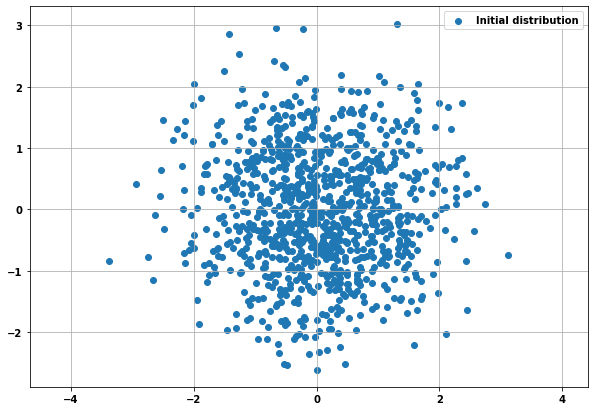

In [538]:
# number of samples from distribution
n = 1000

## new mean and covariance here
mean = np.array([0, 0])

cov = np.eye(2)

# generate point cloud
cloud = np.random.multivariate_normal(mean, cov, n)

# plot scatterplot of the initial cloud
plt.figure(figsize=(10,7))
plt.scatter(cloud[:,0], cloud[:,1],label='Initial distribution')
plt.axis('equal')
plt.legend()
plt.grid()

Let's iteratively apply affine transformation and see how the initial cloud will propagate. Let's use the following:

$$
A =
\left[
\begin{array}{cc}
1.5 & 1 \\
0 & 1.7\\
\end{array}
\right]\\
b = \left[
\begin{array}{c}
7\\
0\\
\end{array}
\right]\\
$$

In [539]:
A = np.array([
    [1.5, 1.0],
    [0.0, 1.7]
 ])
b = np.array([
    [7.0],
    [0.0]
])

In [540]:
# define affine tranform x' = Ax + b here
def linear_transform(cloud: np.ndarray) -> np.ndarray:
    result = (A @ cloud.T + b).T
    return result

**Plot initial distribution and transformed distribution:**

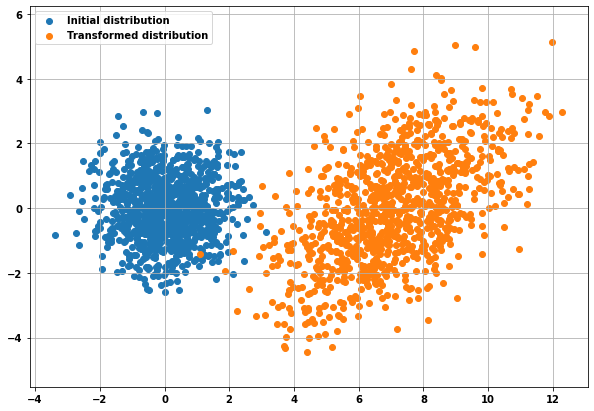

In [541]:
cloud_tf = linear_transform(cloud)
# plot scatterplot of both clouds
plt.figure(figsize=(10,7))
plt.scatter(cloud[:,0], cloud[:,1],label='Initial distribution')
plt.scatter(cloud_tf[:,0], cloud_tf[:,1],label='Transformed distribution')
plt.axis('equal')
plt.legend()
plt.grid()

Let's use analytical expression for mean and covariance propagation for linear case:

$$
\hat{\mu} = A \mu + b\\
\hat{\Sigma} = A\Sigma A^T
$$

In [542]:
# using analytical expressions propagate mean and covariance once
# put your code here
a_mean = linear_transform(mean.reshape(2, -1).T)
print(f"a_mu = {a_mean}")
a_cov = A @ cov @ A.T
print(f"a_sigma = {a_cov}")

a_mu = [[7. 0.]]
a_sigma = [[3.25 1.7 ]
 [1.7  2.89]]


In [543]:
# calculate sample mean and covariance for propagated cloud
# put your code here
s_mean = np.mean(cloud_tf)
print(f"s_mu = {s_mean}")
s_cov = np.cov(cloud_tf.T)
print(f"s_sigma = {s_cov}")

s_mu = 3.5222120267623827
s_sigma = [[3.26088555 1.64152479]
 [1.64152479 2.81491219]]


In [544]:
# calculate and print errors (L2-norm) between sample and analytical mean and covariace
# put code here
err_mean = np.linalg.norm(a_mean - s_mean)
print(f"err_mu = {err_mean}")
err_cov = np.linalg.norm(a_cov - s_cov)
print(f"err_sigma = {err_cov}")

err_mu = 4.949847143929374
err_sigma = 0.11222911815341771


## 1.1 Sequence of transformations

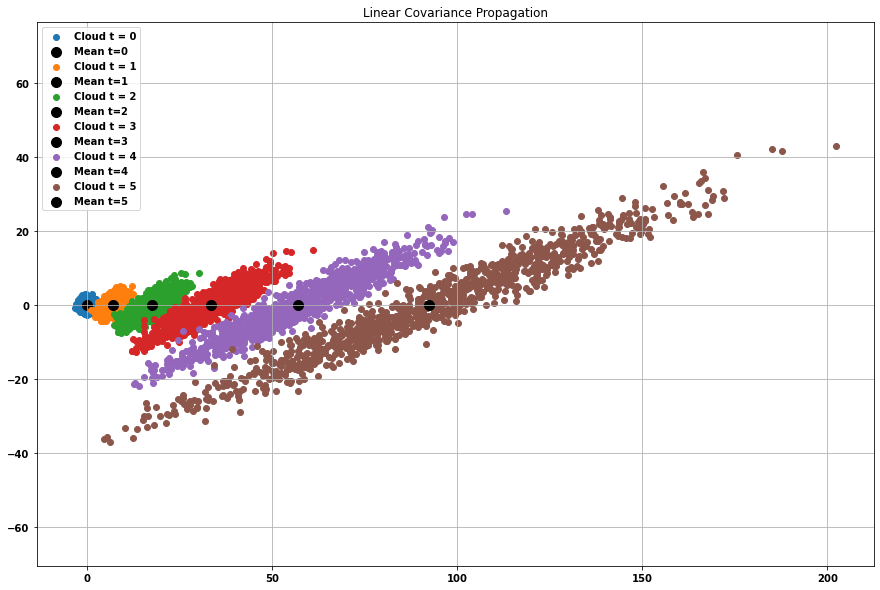

In [545]:
# do N = 5 iterations of propagation
N = 5

plt.figure(figsize=(15,10))
plt.title("Linear Covariance Propagation")

propagated_cloud = cloud # initializing the cloud
means = [cloud.mean(axis=0)] # save means here
covariances = [np.cov(cloud.transpose())] # save covariances here

plt.scatter(propagated_cloud[:,0], propagated_cloud[:,1],label=f'Cloud t = {0}')
plt.scatter(means[-1][0], means[-1][1], marker='o', color='black', s=100, label=f'Mean t={0}')

#propagating for-loop here
for i in range(N):
    propagated_cloud = linear_transform(propagated_cloud)
    plt.scatter(propagated_cloud[:,0], propagated_cloud[:,1],label=f'Cloud t = {i+1}')
    means.append(propagated_cloud.mean(axis=0))
    covariances.append(np.cov(propagated_cloud.transpose()))
    plt.scatter(means[-1][0], means[-1][1], marker='o', color='black', s=100, label=f'Mean t={i+1}')
    
plt.axis('equal')
plt.legend()
plt.grid()

In [546]:
# propagate the same gaussian but compute mean and covariance updates analytically
# print L2 norm of difference between sample mean / covariance and analytical mean / covariance

# put code here
tmp = mean.reshape(2, -1)
analytical_mean = [tmp]  # store all results in this list
for i in range(len(means)):
    print(
        f"t = {i}, error L2 norm for mean = {np.linalg.norm(means[i].reshape(2,-1) - tmp)}"
    )
    tmp = A @ tmp + b


t = 0, error L2 norm for mean = 0.041403121065935786
t = 1, error L2 norm for mean = 0.05612891853258679
t = 2, error L2 norm for mean = 0.07423026213436805
t = 3, error L2 norm for mean = 0.09496396850139659
t = 4, error L2 norm for mean = 0.11635105714467692
t = 5, error L2 norm for mean = 0.1364842374911671


In [547]:
# calcuate the L2 norm of difference between 
tmp = cov
for i in range(len(covariances)):
    print(f't = {i}, error L2 norm for covariance = {np.linalg.norm(covariances[i] - tmp)}')
    tmp = A @ tmp @ A.T

t = 0, error L2 norm for covariance = 0.0361605294449551
t = 1, error L2 norm for covariance = 0.11222911815341771
t = 2, error L2 norm for covariance = 0.5013676116560465
t = 3, error L2 norm for covariance = 2.2635499522489226
t = 4, error L2 norm for covariance = 9.29038654401469
t = 5, error L2 norm for covariance = 35.22687469342794


**Why there is an error? How we can reduce it?**

## 2. Nonlinear transformations

Let's consider `exp()` as our non-linear function:

$$
y := exp(x) + b
$$

where $exp(x) := [exp(x_1), exp(x_2)]^T$ and $b$ is a constant vector and:

$$
b = [4,0]^T
$$

Generate new zero-mean point cloud with small covariance:

$$
\Sigma = 
\left[
\begin{array}{cc}
0.1 & 0\\
0 & 0.1\\
\end{array}
\right]
$$

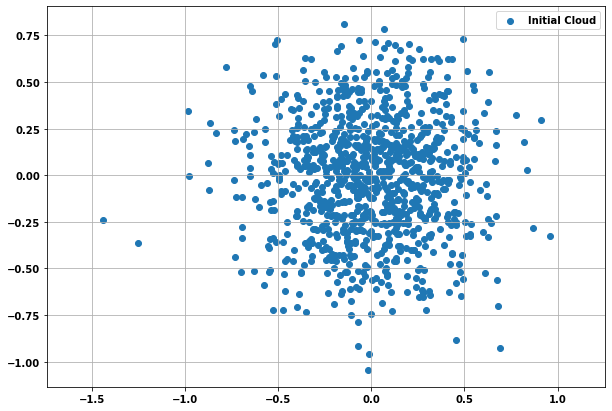

In [548]:
# number of samples
n = 1000

## new mean and covariance here
mean = np.array([0, 0]) 
cov = np.eye(2) * 1e-1 

cloud = np.random.multivariate_normal(mean, cov, n)

# plotting the initial cloud
plt.figure(figsize=(10,7))
plt.scatter(cloud[:,0], cloud[:,1],label='Initial Cloud')
plt.axis('equal')
plt.legend()
plt.grid()

**Define the non-linear transformation here:**

In [549]:
# put your code here
b = np.array([[4], [0]])

def nonlinear_transformation(pts: np.ndarray) -> np.ndarray:
    result = (np.exp(pts).T + b).T
    return result


def jacobian_nonlinear_transformation(pt: np.ndarray) -> np.ndarray:
    result = np.zeros((2, 2))
    result[0, 0] = np.exp(pt[0])
    result[1, 1] = np.exp(pt[1])
    return result

**Apply non-linear transformation to initial cloud and plot initial and propagated cloud:**

In [550]:
nl_tf = nonlinear_transformation(cloud)
print(f"nl_tf = {nl_tf}")

nl_tf = [[5.29100318 1.09607523]
 [4.8659035  1.08629847]
 [4.71163868 1.10470003]
 ...
 [5.49464343 1.46176236]
 [4.73612013 0.88559134]
 [5.42031821 0.81271798]]


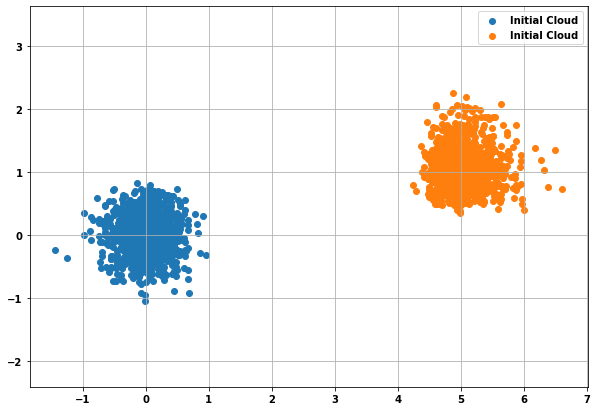

In [551]:
# plotting both clouds
plt.figure(figsize=(10,7))
plt.scatter(cloud[:,0], cloud[:,1],label='Initial Cloud')
plt.scatter(nl_tf[:,0], nl_tf[:,1],label='Initial Cloud')
plt.axis('equal')
plt.legend()
plt.grid()

For non-linear transformation $f$ to propagate a gaussian the linearization is done:

$$
\hat{\mu} = f(\mu)\\
\hat{\Sigma} = J \Sigma J^T, \text{where $J = \nabla f = \left[\dfrac{df}{dx_i}\right]$ - Jacobian of $f$}.
$$

**Compute the Jacobian:**

In [552]:
J = jacobian_nonlinear_transformation(mean)
print(f"J = {J}")

J = [[1. 0.]
 [0. 1.]]


**Propagate the mean:**

In [553]:
mu = nonlinear_transformation(mean.reshape(-1, 2))
print(f"mu = {mu}")

mu = [[5. 1.]]


**Propagate the covariance:**

In [554]:
sigma = J @ cov @ J.T
print(f"sigma = {sigma}")

sigma = [[0.1 0. ]
 [0.  0.1]]


**Error for mean:**

In [555]:
# <--- put your code here
err_mean = np.linalg.norm(mu - np.mean(nl_tf, axis=0))
print(f"err_mean = {err_mean}")

err_mean = 0.0583181059816997


**Error for covariance:**

In [556]:
# <--- put your code here
err_cov = np.linalg.norm(sigma - np.cov(nl_tf.T))
print(f"err_cov = {err_cov}")

err_cov = 0.013499155006171408


**Does linearization working? How it can be improved?**

------------

# II. Probability mass 
_Imagine that your shouting robot Dartsy1D tryes to hit the target - the centre of a one-dimensional interval.  
Find the probability to hit segment defined by the iso-contour value 1 ($\pm \sigma$). Dartsy1D's shooting accuracy is normally distributed.  
Find the same meausre for $\pm 2 \sigma$ and $\pm 3 \sigma$._ 

![](Dartsy1D.png)

This task is to theoretically find the portion of data within 1/2/3-Sigma interval (or iso-contour).  
For simplicity consider standard one-dimensional Normallly distributed accuracy for this task.  
You may need to recall cumulative density function and use `norm.cdf`

In [557]:
def portion_standard(n_sigmas):
    '''
    Probability to meet a sample value within 1-, 2-, 3-Sigma interval of std. normal distribution
    
    Parameters
    ----------
    n_sigmas : number of Sigma intervals from the mean
    
    Returns
    -------
    port : probability
    '''
    assert n_sigmas == 1 or n_sigmas == 2 or n_sigmas == 3, 'Choose 1, 2 or 3'
    
    # Your code below
    port = 
    
    return port

SyntaxError: invalid syntax (3102791436.py, line 16)

In [ ]:
portion_standard(1)

# 3 Mahalanobis distance
In this task we compare euclidian and mahalanobis distances in 2D.  
For that we measure the distances to some test point from mean values of two Gaussian distributions

In [ ]:
# Distributions
mean1 = [-10,0]
cov1 = np.array([
    [1,0],
    [0,1]])

mean2 = [10,0]
cov2 = np.array([
    [6,0],
    [0,6]])

## 1. Sample two normal 2D-distributions
You may need to use `np.random.multivariate_normal(...)`

In [ ]:
n = 1000
# Your code below
cloud1 = 
cloud2 = 

cloud1.shape # Should be (n, 2)

In [ ]:
# Test point
test_point = [-5,5]

In [ ]:
def plot_scene(cloud1, cloud2, mean1, mean2, test_point):
    plt.figure(figsize=(10,7))
    plt.scatter(cloud1[:,0], cloud1[:,1], marker='.', c='g', label='Cloud 1')
    plt.scatter(cloud2[:,0], cloud2[:,1], marker='.', c='b', label='Cloud 2')
    plt.scatter(mean1[0], mean1[1], marker='o', c='y', s=200, label='Mean 1')
    plt.scatter(mean2[0], mean2[1], marker='o', c='r', s=200, label='Mean 2')
    plt.scatter(test_point[0], test_point[1], marker='x', c='k', s=200, label='Test point')
    plt.plot([test_point[0], mean1[0]], [test_point[1], mean1[1]], '--', color='y')
    plt.plot([test_point[0], mean2[0]], [test_point[1], mean2[1]], '--', color='r')
    plt.legend()
    plt.axis('equal')
    plt.grid()

In [ ]:
plot_scene(cloud1, cloud2, mean1, mean2, test_point)

## 2. Answer the question: What point cloud mean value is closer to test point?  
Provide the answer for both, euclidean and mahalanobis distance measure.  
You may need to use SciPy `distance` module.

In [ ]:
# Eucledian distance (test_point, mean1)
# Your code below


In [ ]:
# Eucledian distance (test_point, mean2)
# Your code below


In [ ]:
# Mahalanobis distance (test_point, mean1)
# Your code below


In [ ]:
# Mahalanobis distance (test_point, mean2)
# Your code below


# 4 Drawing iso-contour of a 2D Gaussian

Let's draw the 1-sigma isocontours for the following Gaussian distributions:

 1. $\mathcal{N}(\begin{bmatrix}0.3 \\ 0  \end{bmatrix}, \begin{bmatrix}3 & 0 \\ 0 & 1  \end{bmatrix})$
 2. $\mathcal{N}(\begin{bmatrix}0 \\ 0  \end{bmatrix}, \begin{bmatrix}1 & -1 \\ -1 & 5  \end{bmatrix})$